# K-means Clustering

In this exercise we will perform clustering using the k-means algorithm. The steps of the algorithm are as follows:

- Decide how many cluster to go for. This number is the **k** in k-means.
- Pick k distinct starting point for the algorithm by selecting random points. These are called centroids.
- Allocate all the data points to the nearest centroid.
- Relocate the centroids to the mean value of the points allocated to it.
- Repeat the last two steps until none of the centroids move. The algorithm has then converged.

An interactive illustration of how the algorithm works can be found [here](https://observablehq.com/@andreaskdk/k-means).

We will work with randomly generated data, so we generate a two dimensional dataset.

In [1]:
import numpy as np

def f(c):
    (c_x,c_y)=c
    sigma=0.1
    return [np.random.normal()*sigma+c_x, np.random.normal()*sigma+c_y]
data = sc.parallelize([(0.2, 0.7)]*10000+[(0.7,0.2)]*15000+[(0.7,0.8)]*150000).map(f).toDF(["x", "y"])


How many data points did we generate?

In [12]:
data.count()

175000

This is too much data to visualize, so we will also take a random sample consisting of 1% of the data.

In [2]:
sample_data=data.sample(False, 0.01)

In [3]:
sample_data.count()

1773

We can plot the sample data.

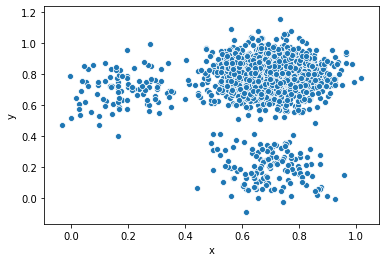

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="x", y="y", data=sample_data.toPandas())

The Spark library called MLLib contains implementations of a number of machine learning algorithms including k-means. Per default MLLib expects input to be a DataFrame with a column of type *Vector* and named "features", so we will have to manipulate our dataframe to include this column. 

In [5]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors

In [6]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
  inputCols=["x", "y"], outputCol="features"
)

data = assembler.transform(data)
sample_data = assembler.transform(sample_data)

To apply the algorithm we specify the number of clusters we want and set the random seed if we want to be able to repeat the starting points. We fit the data to the whole dataset and print the centriods.

In [14]:
kmeans = KMeans().setK(3).setSeed(1)
model=kmeans.fit(data)
centers = model.clusterCenters()
centers

[array([0.70210591, 0.80035276]),
 array([0.69879614, 0.2018779 ]),
 array([0.22339732, 0.70567211])]

Once we have fittet the model we can apply it to the sample data and plot the clusters.

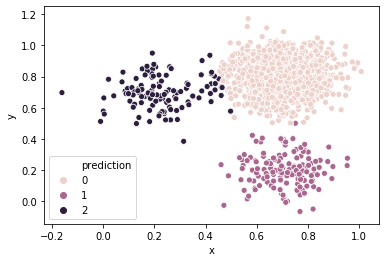

In [11]:
sample_data=model.transform(sample_data)
sns.scatterplot(x="x", y="y", hue="prediction", data=sample_data.toPandas())

We chose to split the data into three clusters. What if we have chosen 2 or 4?

Try to repeat the clustering with a different number of clusters.

Does the random seed matter?

Do you think that the k-means algorithm parallelizes well?